# The Strategy

- Buy when the lower band is crossed and sell when the upper band is crossed

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download('GS', start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


# Data Prep

In [3]:
df['SMA'] = df['Adj Close'].rolling(21).mean()

In [4]:
df['Std Dev'] = df['Adj Close'].rolling(21).std()

In [5]:
df['Upper'] = df.SMA + 2*df['Std Dev']
df['Lower'] = df.SMA - 2*df['Std Dev']

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Std Dev,Upper,Lower
Date,,,,,,,,,,
2019-01-02,164.330002,172.250000,163.350006,172.029999,160.803589,3999400,NaN,NaN,NaN,NaN
2019-01-03,170.660004,171.770004,168.289993,169.509995,158.448044,4060200,NaN,NaN,NaN,NaN
2019-01-04,172.990005,176.000000,171.100006,175.050003,163.626511,3788300,NaN,NaN,NaN,NaN
2019-01-07,175.229996,177.830002,172.270004,176.020004,164.533203,3152100,NaN,NaN,NaN,NaN
2019-01-08,177.779999,178.100006,172.899994,175.369995,163.925629,2692700,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-05-10,311.720001,315.149994,300.649994,305.059998,305.059998,2798400,319.330954,9.714777,338.760508,299.901401
2022-05-11,305.059998,310.910004,301.000000,301.549988,301.549988,2320600,318.416191,10.450085,339.316362,297.516021
2022-05-12,300.000000,302.890015,293.899994,299.410004,299.410004,3408300,317.446192,11.233214,339.912620,294.979763


# Buying Signals

In [7]:
df['Buy'] = np.where(df.Lower > df['Adj Close'], True,False)
df['Sell'] = np.where(df.Upper < df['Adj Close'], True,False)

In [8]:
df 

,Open,High,Low,Close,Adj Close,Volume,SMA,Std Dev,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2019-01-02,164.330002,172.250000,163.350006,172.029999,160.803589,3999400,NaN,NaN,NaN,NaN,False,False
2019-01-03,170.660004,171.770004,168.289993,169.509995,158.448044,4060200,NaN,NaN,NaN,NaN,False,False
2019-01-04,172.990005,176.000000,171.100006,175.050003,163.626511,3788300,NaN,NaN,NaN,NaN,False,False
2019-01-07,175.229996,177.830002,172.270004,176.020004,164.533203,3152100,NaN,NaN,NaN,NaN,False,False
2019-01-08,177.779999,178.100006,172.899994,175.369995,163.925629,2692700,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,311.720001,315.149994,300.649994,305.059998,305.059998,2798400,319.330954,9.714777,338.760508,299.901401,False,False
2022-05-11,305.059998,310.910004,301.000000,301.549988,301.549988,2320600,318.416191,10.450085,339.316362,297.516021,False,False
2022-05-12,300.000000,302.890015,293.899994,299.410004,299.410004,3408300,317.446192,11.233214,339.912620,294.979763,False,False


In [9]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,SMA,Std Dev,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2019-01-31,200.100006,202.350006,196.949997,198.009995,185.088181,5604500,175.755897,11.581527,198.918951,152.592843,False,False
2019-02-01,198.000000,199.639999,196.539993,196.539993,183.714127,3174200,176.846875,11.174530,199.195935,154.497815,False,False
2019-02-04,195.800003,197.759995,194.789993,197.720001,184.817139,2400200,178.102546,10.462551,199.027649,157.177444,False,False
2019-02-05,198.119995,199.330002,196.860001,198.009995,185.088181,2601000,179.124531,10.016510,199.157551,159.091510,False,False
2019-02-06,197.179993,199.059998,195.830002,196.619995,183.788864,2063100,180.041467,9.481040,199.003548,161.079386,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,311.720001,315.149994,300.649994,305.059998,305.059998,2798400,319.330954,9.714777,338.760508,299.901401,False,False
2022-05-11,305.059998,310.910004,301.000000,301.549988,301.549988,2320600,318.416191,10.450085,339.316362,297.516021,False,False
2022-05-12,300.000000,302.890015,293.899994,299.410004,299.410004,3408300,317.446192,11.233214,339.912620,294.979763,False,False


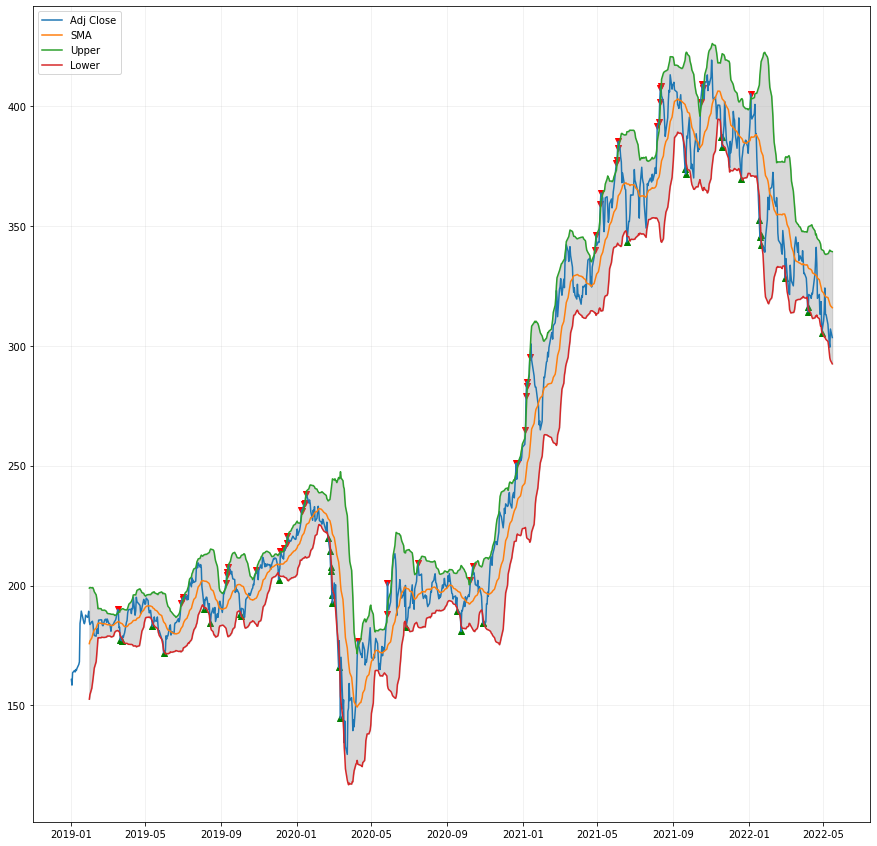

In [10]:
plt.rcParams['figure.figsize'] = 15,15
plt.grid(True, alpha = 0.2)
plt.plot(df[['Adj Close','SMA','Upper','Lower']])
plt.legend(['Adj Close','SMA','Upper','Lower'],loc=2)
plt.scatter(df.index[df['Buy']],df[df['Buy']]['Adj Close'], marker = '^',color = 'g')
plt.scatter(df.index[df['Sell']],df[df['Sell']]['Adj Close'], marker = 'v',color = 'r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)

In [11]:
buys = []
sells = []
open_posi = False

for i in range(len(df)):
    if df.Lower[i] > df['Adj Close'][i]:
        if open_posi == False:
            buys.append(i)
            open_posi = True
    elif df.Upper[i] < df['Adj Close'][i]:
        if open_posi:
            sells.append(i)
            open_posi = False
        

In [12]:
buys

[55, 148, 189, 232, 286, 374, 431, 460, 620, 684, 726, 767]

In [13]:
sells

[123, 172, 207, 235, 320, 386, 446, 497, 654, 703, 758]

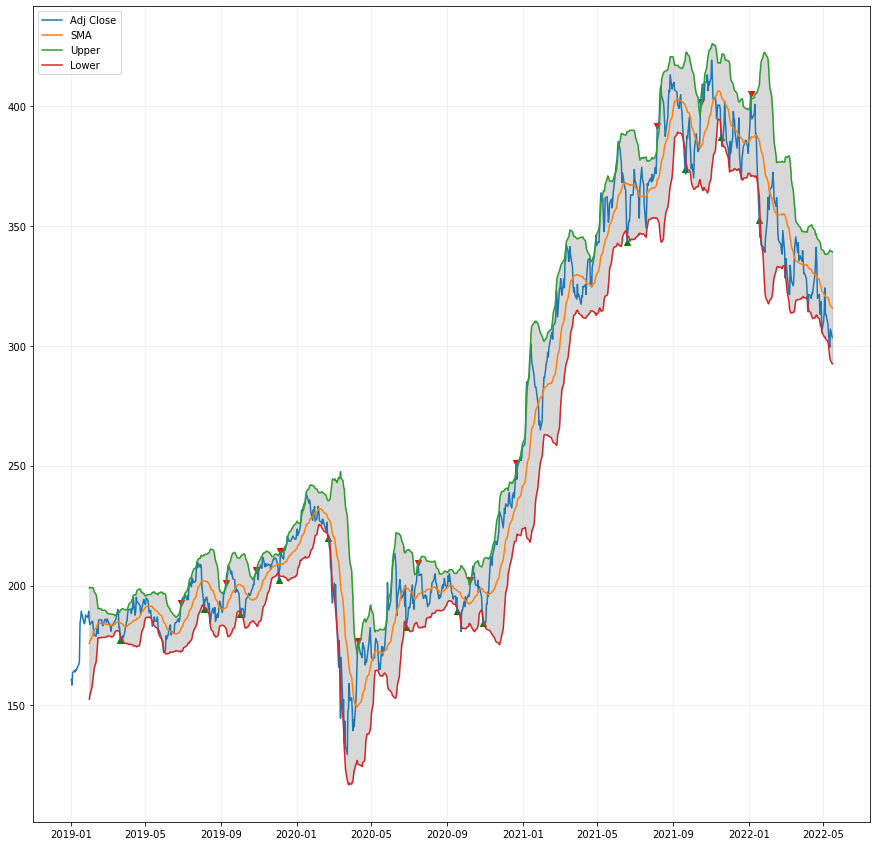

In [14]:
plt.rcParams['figure.figsize'] = 15,15
plt.grid(True, alpha = 0.2)
plt.plot(df[['Adj Close','SMA','Upper','Lower']])
plt.legend(['Adj Close','SMA','Upper','Lower'],loc=2)
plt.scatter(df.iloc[buys].index,df.iloc[buys]['Adj Close'], marker = '^',color = 'g')
plt.scatter(df.iloc[sells].index,df.iloc[sells]['Adj Close'], marker = 'v',color = 'r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)

# Back test

In [15]:
x = df.iloc[buys]['Adj Close']
y = df.iloc[sells]['Adj Close']
merged = pd.concat([x,y],axis=1)

In [16]:
merged.columns = ['Buys','Sells']

In [17]:
merged

,Buys,Sells
Date,,
2019-03-22,177.342072,NaN
2019-06-28,NaN,192.885910
2019-08-05,190.133102,NaN
2019-09-09,NaN,201.097610
2019-10-02,188.072464,NaN
2019-10-28,NaN,206.571396
2019-12-03,202.479507,NaN
2019-12-06,NaN,214.280640
2020-02-21,220.014236,NaN


In [18]:
totalprofits = merged.shift(-1).Sells - merged.Buys

In [19]:
totalprofits

Date
2019-03-22    15.543839
2019-06-28          NaN
2019-08-05    10.964508
2019-09-09          NaN
2019-10-02    18.498932
2019-10-28          NaN
2019-12-03    11.801132
2019-12-06          NaN
2020-02-21   -43.153198
2020-04-09          NaN
2020-06-26    26.763535
2020-07-15          NaN
2020-09-17    12.777756
2020-10-08          NaN
2020-10-28    66.668533
2020-12-21          NaN
2021-06-18    48.281891
2021-08-06          NaN
2021-09-20    27.630463
2021-10-15          NaN
2021-11-17    17.880066
2022-01-04          NaN
2022-01-18          NaN
dtype: float64

In [20]:
realprofit = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [21]:
realprofit.mean()

0.08563979854452065